In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Extract Independent and dependent features
X = dataset.iloc[:,3:13]
y = dataset.iloc[:, 13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [ ]:
# feature Engineering
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [ ]:
geography

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True
...,...,...
9995,False,False
9996,False,False
9997,False,False
9998,True,False


In [ ]:
gender

,Male
0,False
1,False
2,False
3,False
4,False
...,...
9995,True
9996,True
9997,False
9998,True


In [ ]:
geography = geography.astype(int)
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [ ]:
gender = gender.astype(int)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [ ]:
# concatenate these variables with dataframe
X = X.drop(['Geography', 'Gender'], axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
X = pd.concat([X, geography, gender], axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
# splitting the dataset into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# feature scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
# ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
# intialize ANN
classifier = Sequential()


In [ ]:
# Adding the input layer
classifier.add(Dense(units=11, activation='relu'))

In [ ]:
# Adding the first hidden layer
classifier.add(Dense(units=7, activation='relu'))

In [ ]:
# Adding the second hidden layer
classifier.add(Dense(units=6, activation='relu'))

In [ ]:
# Adding the output layer
classifier.add(Dense(1, activation='sigmoid'))

In [ ]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33,batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7207 - loss: 0.6019 - val_accuracy: 0.8042 - val_loss: 0.4496
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8092 - loss: 0.4338 - val_accuracy: 0.8164 - val_loss: 0.4321
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8225 - loss: 0.4140 - val_accuracy: 0.8213 - val_loss: 0.4180
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8291 - loss: 0.4137 - val_accuracy: 0.8247 - val_loss: 0.4020
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8392 - loss: 0.3822 - val_accuracy: 0.8383 - val_loss: 0.3810
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8574 - loss: 0.3455 - val_accuracy: 0.8406 - val_loss: 0.3733
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8564 - loss: 0.3536 - val_accuracy: 0.8440 - val_loss: 0.3676
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8648 - loss: 0.3388 - 

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

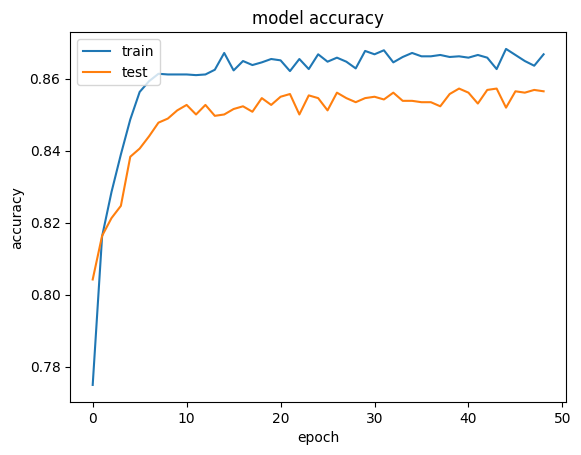

In [ ]:
# summarize the history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()


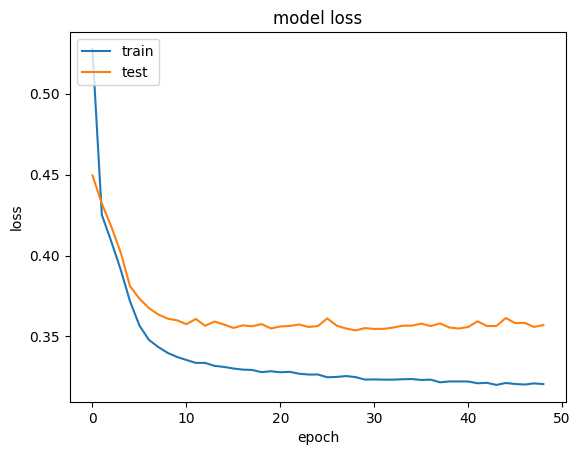

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# making predictions and evaluating the model
# predicting the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [ ]:
 # make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1522,   73],
       [ 207,  198]])

In [ ]:
# calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [ ]:
score

0.86

In [ ]:
# get the weights
classifier.get_weights()

[array([[ 0.048928  , -0.12296388, -0.39353114, -0.06760745,  0.36834973,
          0.03253743,  0.15426256, -0.12164416,  0.15321183, -0.06102366,
          0.33530545],
        [ 0.01445053,  0.7968697 , -0.08532838, -0.5088665 , -0.59785354,
          0.26975325, -0.1525347 , -0.6828412 ,  1.0309645 , -0.28302205,
         -0.05366077],
        [ 0.12798081, -0.01147222, -0.08664495,  0.13259056, -0.07821284,
         -0.21057335,  0.04689883,  0.15978286,  0.20855393, -0.26094806,
          0.42915034],
        [ 0.5021912 , -0.01960597, -0.26197898,  0.49997407, -0.08470643,
         -0.00857008,  0.00924697,  0.46723145, -0.00789983, -0.38525796,
         -0.06552324],
        [ 1.1409019 , -0.90357524,  0.38338077,  0.26489234,  0.617791  ,
          0.40859047,  0.7993295 ,  0.07470597,  0.53226894,  0.33770084,
         -0.8107781 ],
        [-0.16029684, -0.23871906, -0.22060649, -0.23047848,  0.10982196,
          0.36999422, -0.03822471, -0.03644582, -0.06754033,  0.0719441